## Linear Regression

This is to show the workings of linear regression (with polynomial basis function).

Let's first simulate some data (X) and create a simple ground truth ($Y=3X^2+5X+9$), so we know what we want to model.

In [170]:
import numpy as np
import matplotlib.pyplot as plt

#Generate data
X = np.random.uniform(low=0.-3, high=3.0, size=(50,1))
Y = 3*X**2 + 5*X + 9

To model the quadratic part of this function, we add $x^2$ to the input matrix

In [171]:
X_2 = np.concatenate((X, X**2), axis=1)

This is what the data looks like:

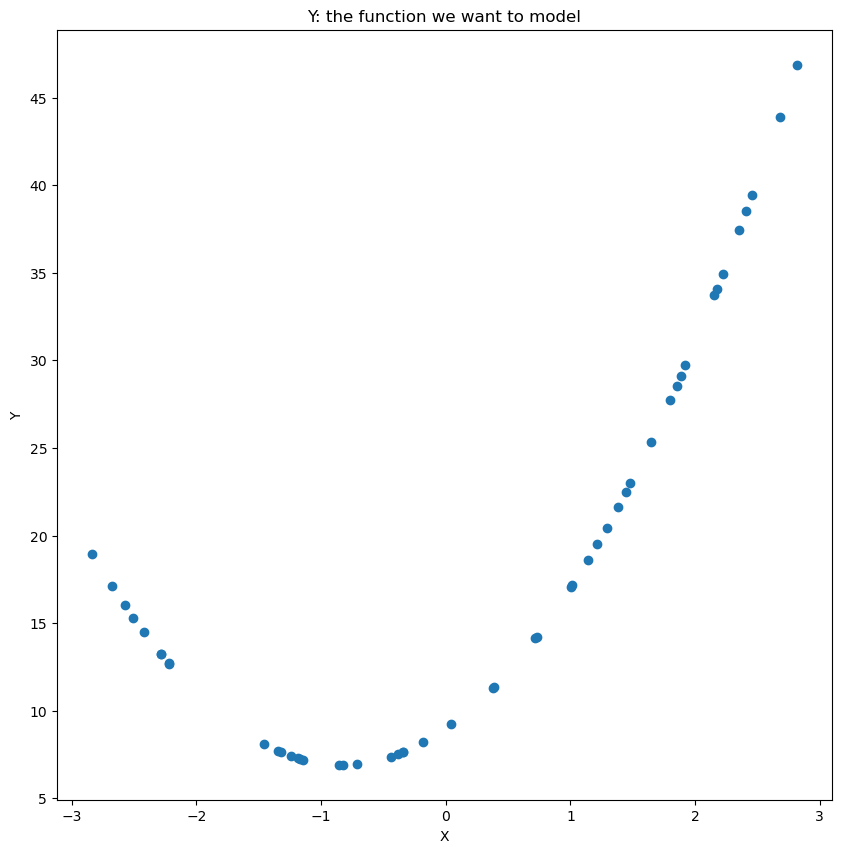

In [172]:
plt.figure(figsize=(10, 10))
plt.title('Y: the function we want to model')
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

We want to model Y (pretending we don't know this function). We want to do so with a linear regression parameterized by $\mathbf{w} = \begin{bmatrix} w_0 \ w_1 \ w_2 \end{bmatrix}$:

$\hat{y} = w_0 + w_1 \cdot x_1 + w_2 \cdot x_2$

or in Matrix form, where ![Math expression](https://latex.codecogs.com/svg.latex?X%20\in%20\mathbb{R}^{N%20\times%20D}) and ![Math expression](https://latex.codecogs.com/svg.latex?w%20\in%20\mathbb{R}^{D%20\times%201}) with N being the sample size and D the number of coefficients:

$\hat{y} = Xw$


By adding a column of ones too the X matrix, we can include $w_0$ in the weight vector.

How can we find the optimal weights to model Y?
We use the Least Squares loss:

$L(w)  = \frac{1}{N} (Xw - y)^T(Xw - y)$

To find the minimum, we take the gradient with respect to w

$\nabla_w L(w) = \frac{1}{2} (w^TX^TXw-2w^TX^Ty+y^Ty)$

and set it to zero

$0 = X^TXw-X^Ty$

Thus, the optimal weights are given by

$w = (X^TX)^{-1}X^Ty$


In [173]:
#Let's add a column of ones to X_2 for the bias term
X_2 = np.concatenate((np.ones((X_2.shape[0], 1)), X_2), axis=1)

#Then we calculate the optimal weights
w = np.linalg.inv(X_2.T @ X_2) @ X_2.T @ Y

#And estimate y
y_hat = X_2 @ w

As you can see, we can perfectly model Y (I have shifted Y by adding 1, otherwise they would completely overlap)

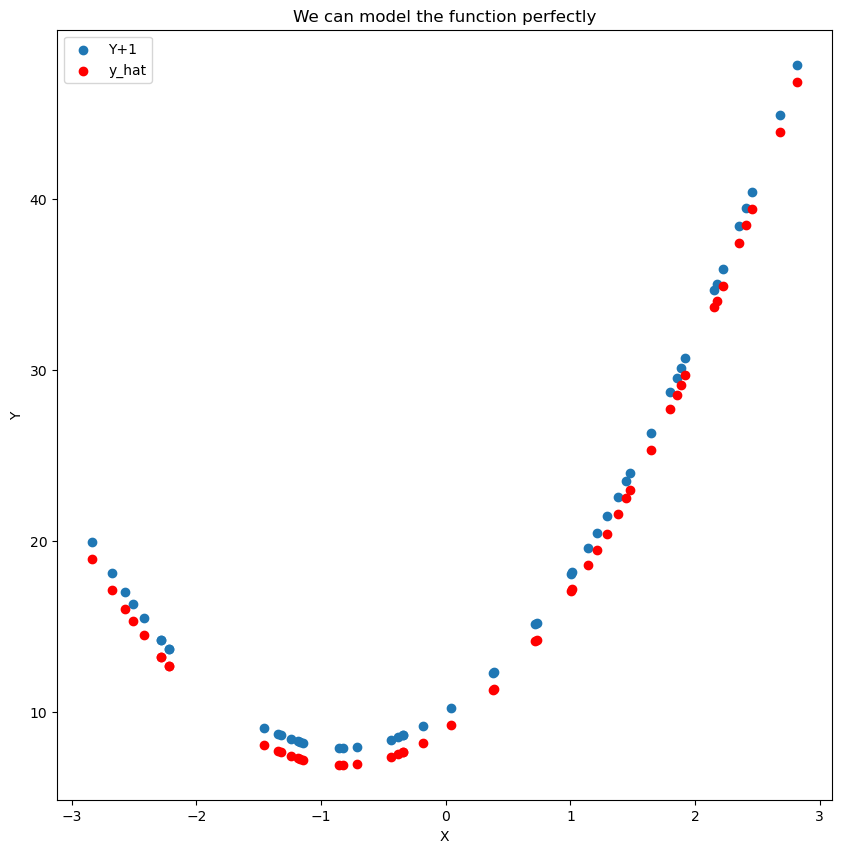

In [174]:
plt.figure(figsize=(10, 10))
plt.title('We can model the function perfectly')
plt.scatter(X, Y+1, label='Y+1')
plt.scatter(X, y_hat, color='red', label='y_hat')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Let's try it for a more complicated example:

$Y=sin(2\pi X)+\epsilon$

where $\epsilon \sim \mathcal{N}(0,\beta)$

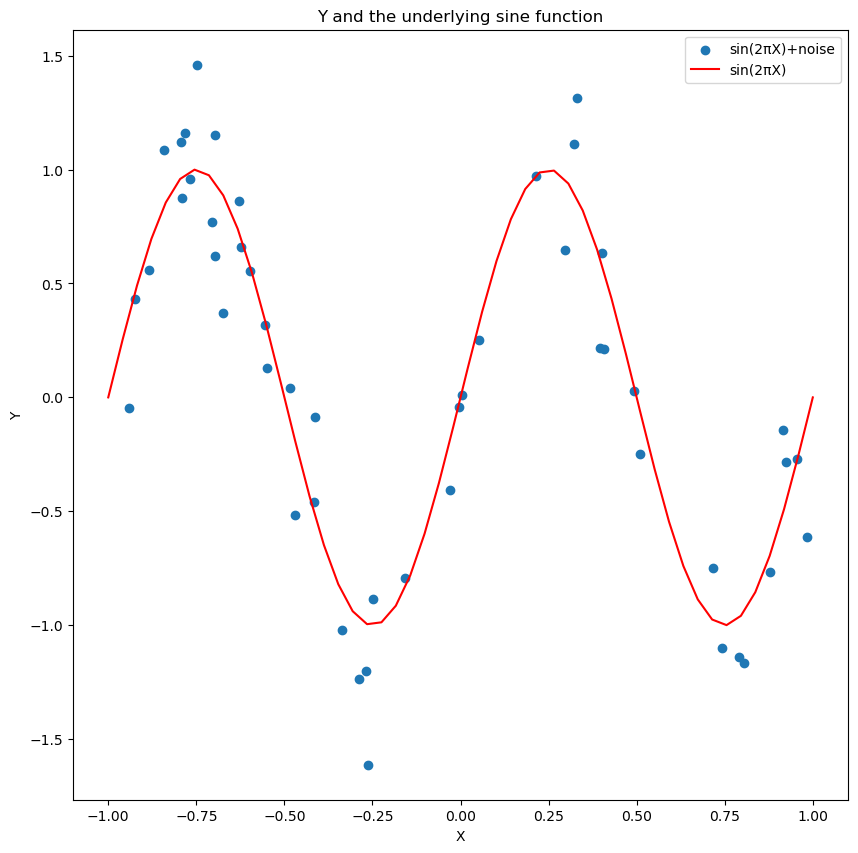

In [175]:
#Generate data
X = np.random.uniform(low=-1.0, high=1.0, size=(50, 1))
noise = np.random.normal(0, 0.3, size=(50, 1))
Y = np.sin(2*np.pi*X) + noise

#Plot scatter plot
plt.figure(figsize=(10, 10))
plt.title('Y and the underlying sine function')
plt.scatter(X, Y, label='sin(2πX)+noise')

#Plot the sine function (without noise)
plt.plot(np.linspace(-1,1,50), np.sin(2*np.pi*np.linspace(-1,1,50)), color='red', label='sin(2πX)')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

Let's use a polynomial transformation again up to $x^3$

In [176]:
X_3 = np.concatenate((np.ones((50, 1)), X, X**2, X**3), axis=1)
X_3.shape

(50, 4)

In [177]:
#Then we calculate the optimal weights
w = np.linalg.inv(X_3.T @ X_3) @ X_3.T @ Y

#And estimate y
y_hat = X_3 @ w

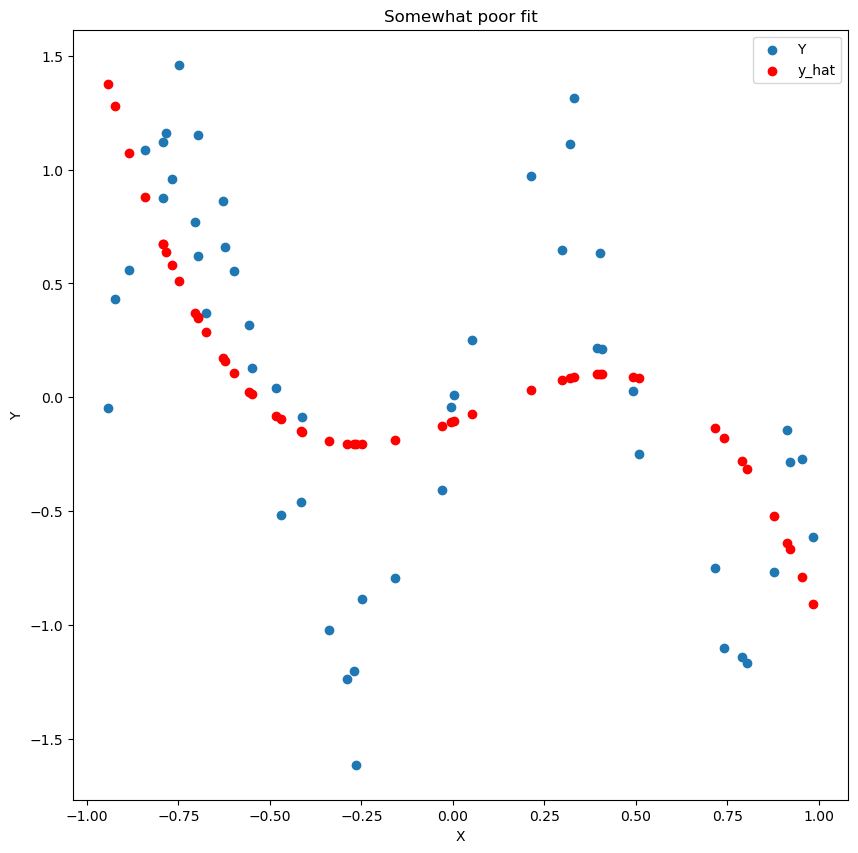

In [179]:
#Plot scatter plots
plt.figure(figsize=(10, 10))
plt.title('Somewhat poor fit')
plt.scatter(X, Y, label='Y')
plt.scatter(X, y_hat, color='red', label='y_hat')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

It does not really get the shape. Let's try with a polynomial up to $x^5$

In [180]:
X_5 = np.concatenate((np.ones((50, 1)), X, X**2, X**3, X**4, X**5), axis=1)
X_5.shape

(50, 6)

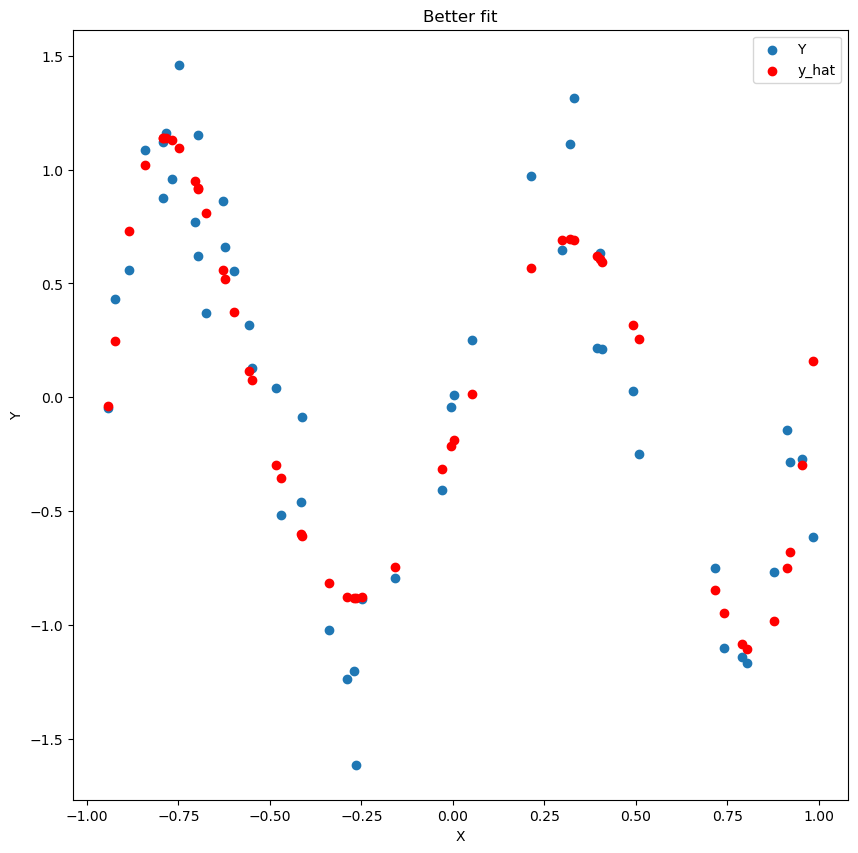

In [181]:
#Then we calculate the optimal weights
w = np.linalg.inv(X_5.T @ X_5) @ X_5.T @ Y

#And estimate y
y_hat = X_5 @ w

#Plot scatter plots
plt.figure(figsize=(10, 10))
plt.title('Better fit')
plt.scatter(X, Y, label='Y')
plt.scatter(X, y_hat, color='red', label='y_hat')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

A lot better, but while increasing the order of the polynomial improves the fit, we may run into overfitting (use train-validation split to check for this!)